# Figure 3

In [1]:
import NotebookImport
from Setup.Imports import *

importing IPython notebook from Setup/Imports

Populating the interactive namespace from numpy and matplotlib


In [2]:
from Setup.Read_HIV_Data import *

importing IPython notebook from Setup/Read_HIV_Data

In [3]:
import Setup.DX_Imports as dx

importing IPython notebook from Setup/DX_Imports

Set of patients used in analysis of age advancement

importing IPython notebook from Parallel/Age_HIV_Features

importing IPython notebook from HIV_Age_Advancement

importing IPython notebook from Setup/MethylationAgeModels

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.2138     0.9326    5.59 1.25e-07 ***
chron_age     0.9790     0.0600   16.32  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.886 on 132 degrees of freedom
Multiple R-squared:  0.6685,	Adjusted R-squared:  0.666 
F-statistic: 266.2 on 1 and 132 DF,  p-value: < 2.2e-16


                2.5 %   97.5 %
(Intercept) 3.3689637 7.058680
chron_age   0.8602881 1.097651



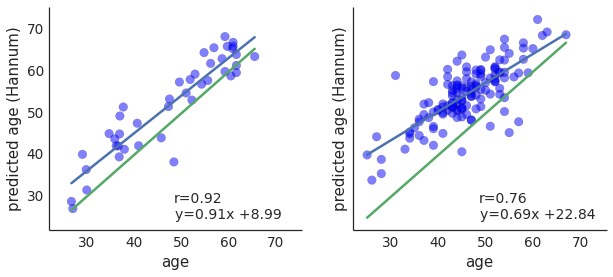

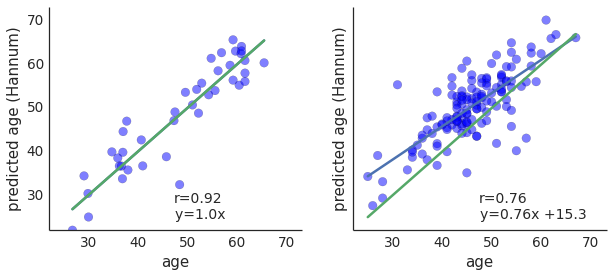

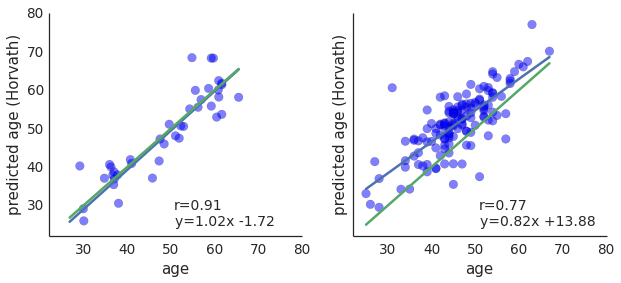

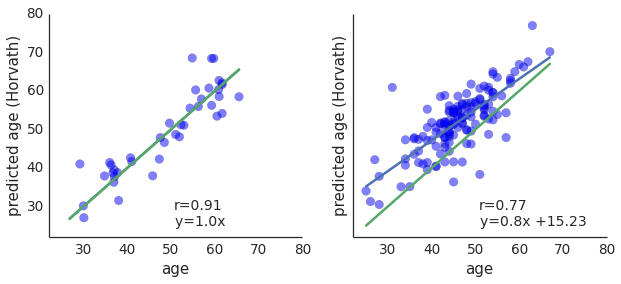

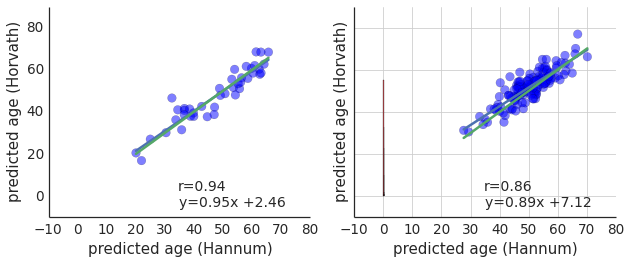

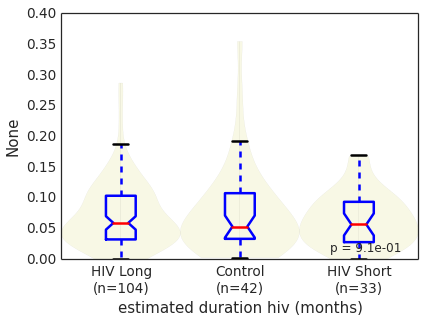

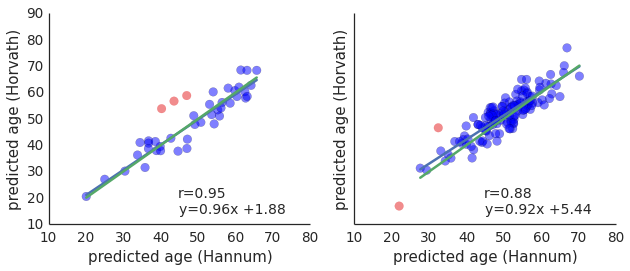

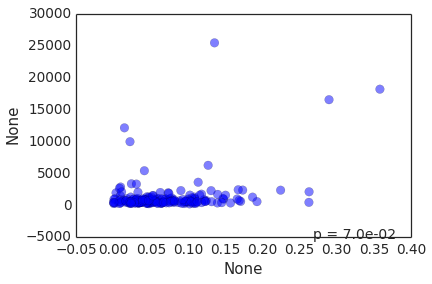

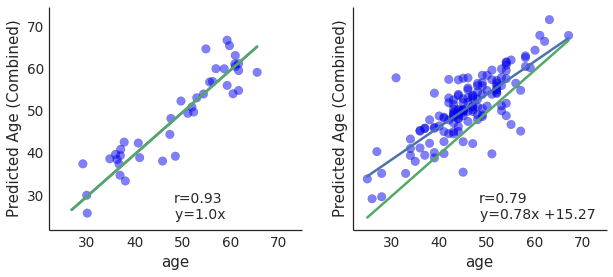

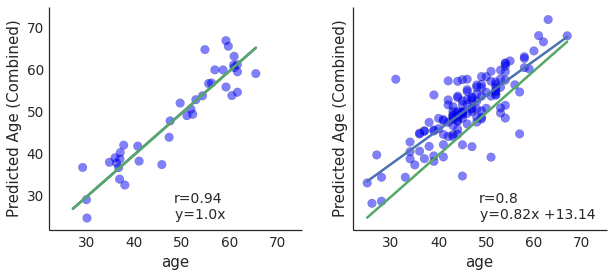

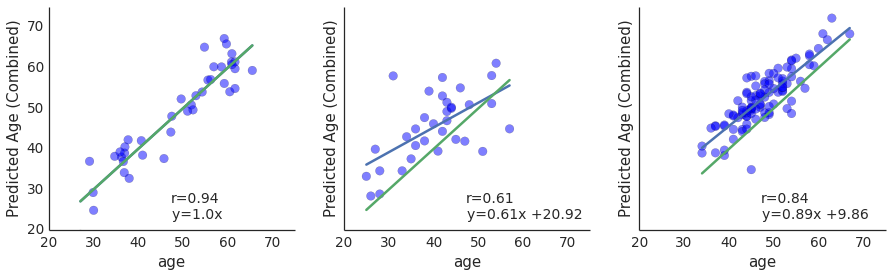

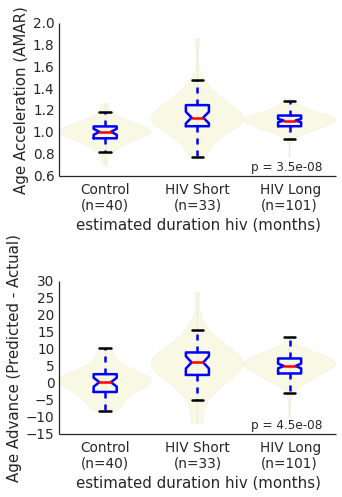

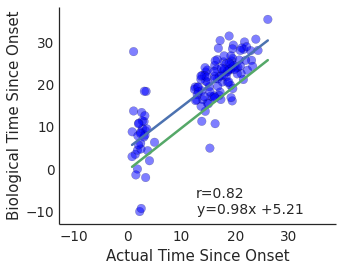

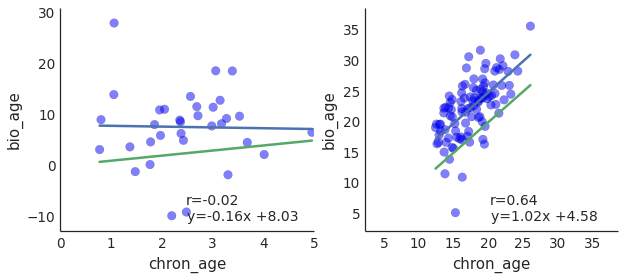

In [4]:
import Parallel.Age_HIV_Features as fx

In [5]:
keepers = fx.pred_c.index

In [6]:
features = {'Age only': fx.features['Age (BH)'],
            'HIV + Age': fx.features['HIV + Age (BH)'],
            'HIV only': fx.features['HIV (BH)']}

probes_sets = {'PRC2': dx.prc2_probes, 'CpG island': dx.cpg_island,
               'DHS': dx.dhs_site, 'Enhancer': dx.enhancer,
               'Gene body': dx.gene_body, 'TSS': dx.gene_tss,
               'Promoter': dx.promoter}

In [7]:
c1 = pd.DataFrame({i:v.value_counts() for i,v in features.iteritems()}).T
c1

,False,True
Age only,451748,21296
HIV + Age,467413,5631
HIV only,397314,75730


In [9]:
c2 = pd.DataFrame({i:v.value_counts() for i,v in probes_sets.iteritems()}).T
c2

,False,True
CpG island,314588,130023
DHS,425596,59916
Enhancer,382953,102559
Gene body,309941,175571
PRC2,406430,79082
Promoter,387422,98090
TSS,345509,140003


In [10]:
associations = {}
for i,a in features.iteritems():
    for j,b in probes_sets.iteritems():
        associations[(i,j)] = fisher_exact_test(a,b.ix[fx.probe_idx])

In [11]:
o = ['DHS','PRC2','CpG island','Enhancer', 'TSS','Gene body','Promoter']
p = ['HIV only','HIV + Age', 'Age only']
df = pd.concat(associations).unstack()['odds_ratio'].unstack().T

In [12]:
pd.concat(associations).unstack(1)[o]

DHS      PRC2  CpG island   Enhancer       TSS  Gene body  Promoter
Age only  odds_ratio   1.91e+00  2.76e+00    1.35e+00   1.13e+00  1.21e+00   8.23e-01  8.46e-01
          p           1.76e-267  0.00e+00    4.15e-83   8.89e-14  2.74e-37   4.82e-39  1.00e-20
HIV + Age odds_ratio   2.31e+00  3.50e+00    3.15e+00   9.32e-01  1.36e+00   7.07e-01  9.50e-01
          p           8.30e-136  0.00e+00    0.00e+00   3.50e-02  1.26e-26   6.77e-33  1.31e-01
HIV only  odds_ratio   9.90e-01  8.20e-01    1.26e+00   7.12e-01  1.05e+00   9.21e-01  1.21e+00
          p            4.15e-01  1.23e-72   1.29e-152  4.82e-242  6.99e-09   4.27e-23  1.23e-91

HIV only, Age only

In [13]:
sns.set_context("paper", rc={"lines.linewidth": 2.5, 
                             "font_size":14})
sns.set_style("white")

In [14]:
df.ix[o[::-1],p]

,HIV only,HIV + Age,Age only
Promoter,1.21,0.95,0.85
Gene body,0.92,0.71,0.82
TSS,1.05,1.36,1.21
Enhancer,0.71,0.93,1.13
CpG island,1.26,3.15,1.35
PRC2,0.82,3.50,2.76
DHS,0.99,2.31,1.91


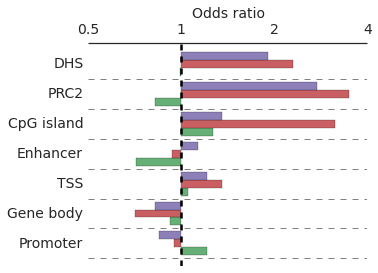

In [14]:
fig, ax = subplots(figsize=(5,4))
cc = sns.color_palette()
ax.xaxis.tick_top()
np.log2(df.ix[o[::-1],p]).plot(kind='barh', ax=ax, alpha=.9, width=.8, 
                         color=[cc[1],  cc[2], cc[3]])
ax.set_xticks([-1,0,1,2])
ax.set_xticklabels([.5,1,2,4], size=14)
ax.set_xbound(-1., 2.)
ax.set_ylim(-.75, 6.72)
ax.set_xlabel('Odds ratio', size=14)
ax.xaxis.set_label_position('top') 
ax.legend().set_visible(False)
ax.spines['left'].set_visible(False)
#ax.set_yticklabels(o[::-1], x=.1)
for i in range(len(o)):
    ax.axhline(i-.5, color='grey', ls='--', lw=1)
prettify_ax(ax, top=True)

In [15]:
def venn_pandas(a, b, colors=None, alpha=.7, ax=None,
                fontsize=14):
    from matplotlib_venn import venn2
    
    _, ax = init_ax(ax)
    if colors is None:
        colors = np.array(plt.rcParams['axes.color_cycle'])[[0, 2, 4]]
    gc = pd.concat([a, b], axis=1).dropna().astype(int).astype(str).apply(lambda s: ''.join(s), axis=1)
    v = venn2(gc.value_counts().sort_index()[1:], 
              set_labels=[b.name, a.name], normalize_to=1.0,
              ax=ax)
    v.patches[0].set_facecolor(colors[0])
    v.patches[1].set_facecolor(colors[1])
    v.patches[2].set_facecolor(colors[2])
    for p in v.patches:
        p.set_alpha(alpha)
        p.set_lw(2)
    for l in v.subset_labels:
        l.set_fontsize(fontsize)
    for l in v.set_labels:
        l.set_fontsize(fontsize)
    return v

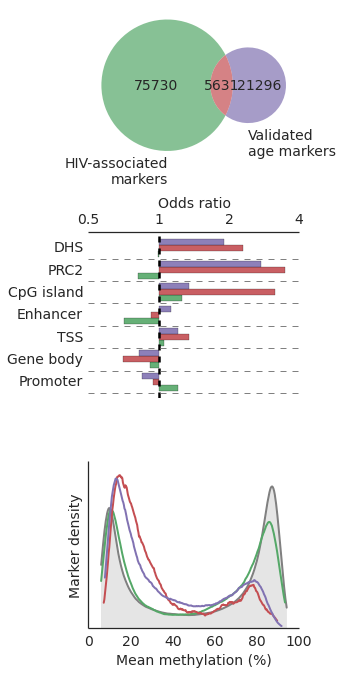

In [16]:
fig, axs = subplots(3,1, figsize=(5,10))
cc = sns.color_palette()

a,b = fx.g_age, fx.g_hiv
a.name = 'Validated\nage markers'
b.name = 'HIV-associated\nmarkers'
venn_pandas(fx.g_age, fx.g_hiv, colors=[cc[1], cc[3],  cc[2]],
            ax=axs[0], fontsize=14)

ax=axs[1]
ax.xaxis.tick_top()
np.log2(df.ix[o[::-1],p]).plot(kind='barh', ax=ax, alpha=.9, width=.8, 
                         color=[cc[1],  cc[2], cc[3]])
ax.set_xticks([-1,0,1,2])
ax.set_xticklabels([.5,1,2,4], size=14)
ax.set_xbound(-1., 2.)
ax.set_ylim(-.75, 6.72)
ax.set_xlabel('Odds ratio', size=14)
ax.xaxis.set_label_position('top') 
ax.legend().set_visible(False)
ax.spines['left'].set_visible(False)
#ax.set_yticklabels(o[::-1], x=.1)
for i in range(len(o)):
    ax.axhline(i-.5, color='grey', ls='--', lw=1)
prettify_ax(ax, top=True)

ax = axs[2]
mm = fx.mm #mean methylation for control patients
draw_dist(mm.ix[ti(features['HIV only'])], ax=ax, colors=cc[1])
draw_dist(mm.ix[ti(features['HIV + Age'])], ax=ax, colors=cc[2])
draw_dist(mm.ix[ti(features['Age only'])], ax=ax, colors=cc[3])

d = smooth_dist(mm)
ax.fill_between(d.index, 0, d, color='grey', alpha=.2)
ax.plot(d.index, d, color='grey', lw=2, zorder=-1)
ax.set_ylabel('Marker density', size=14)
ax.set_yticks([])
ax.set_xlabel('Mean methylation (%)', size=14)
ax.set_xticks([0, .2, .4, .6, .8, 1.])
ax.set_xticklabels(['0', '20', '40', '60', '80', '100'],
                   size=14)
ax.set_ybound(0,4.2)
ax.set_xbound(0,1)
prettify_ax(ax)
fig.tight_layout(pad=2)
fig.savefig(FIGDIR + 'fig3_ab_c.pdf')